In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [81]:
#lets create synthetic data points
from sklearn.datasets import make_classification

In [82]:
X,Y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [83]:
pd.DataFrame(X)[0]

0     -2.716610
1      2.080043
2      1.235497
3     -2.275329
4      0.628946
         ...   
995   -0.990417
996   -1.127740
997    1.415683
998    0.598265
999   -1.463817
Name: 0, Length: 1000, dtype: float64

In [ ]:
X_df=pd.DataFrame(X)

0      0.274870
1      0.060380
2      1.715890
3      1.191708
4      1.565461
         ...   
995    0.909314
996    0.436705
997    1.914921
998    1.498801
999    1.778256
Name: 1, Length: 1000, dtype: float64

<Axes: >

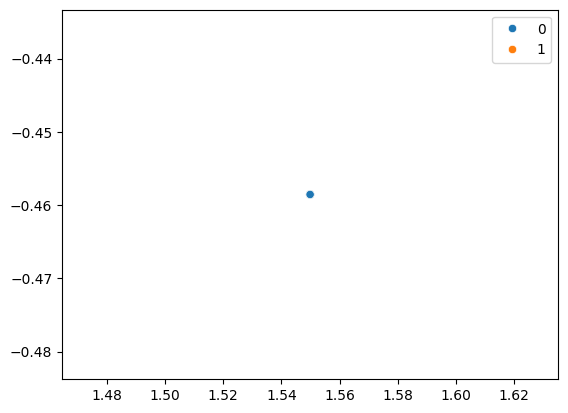

In [92]:
sns.scatterplot(x=X_df[0],y=X_df[1],hue=Y)

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=45)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC(kernel='linear')

In [ ]:
svc.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
#Prediction
Y_pred=svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[125   0]
 [  0 125]]


In [86]:
rbf=SVC(kernel='rbf')

In [87]:
rbf.fit(X_train,Y_train)

SVC()

In [88]:
# Preiction
Y_pred1=rbf.predict(X_test)

In [89]:
print(classification_report(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[125   0]
 [  0 125]]


In [91]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train,Y_train)
# Preiction
Y_pred2=rbf.predict(X_test)
print(classification_report(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      1.00      1.00       125

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[125   0]
 [  0 125]]


In [ ]:
poly.intercept_,poly.coef_

HYPERTUNING WITH SVC

In [94]:
# kernals--- sigmoid,rbf,polynomial,....
# rbf use for higher dimension 
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001],
            'kernel':['rbf']}

In [100]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=10,verbose=5)

In [101]:
grid.fit(X_train,Y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 4/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.840 total time=   0.0s
[CV 6/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 7/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.867 total time=   0.0s
[CV 8/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 9/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 10/10] END ......C=0.1, gamma=1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/10] END .....C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   0.0s
[CV 2/10] END .....C=0.1, gamma=0.1, kernel=rb

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
             verbose=5)

In [102]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [104]:
Y_pred3=rbf.predict(X_test)
print(classification_report(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))

              precision    recall  f1-score   support

           0       0.60      0.98      0.75       121
           1       0.96      0.40      0.56       129

    accuracy                           0.68       250
   macro avg       0.78      0.69      0.65       250
weighted avg       0.79      0.68      0.65       250

[[119   2]
 [ 78  51]]
